In [284]:
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack as fftpk
import numpy as np
from scipy.fft import rfft, rfftfreq
from scipy.io.wavfile import write
from matplotlib import pyplot as plt

In [285]:
# ./audio.wav (relative file)
file_name = "10khz-sine-noise"
sample_rate, signal = wavfile.read(file_name + ".wav")

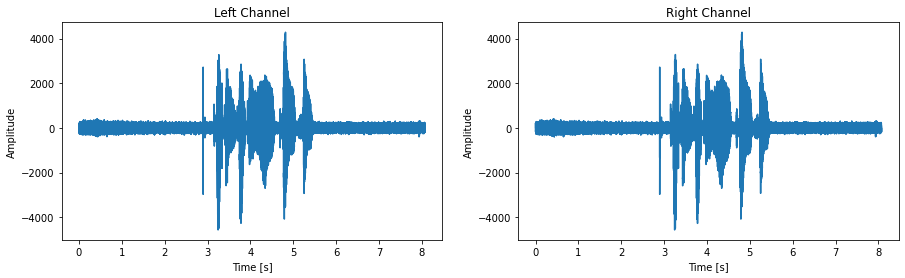

In [286]:
# duration = len(signal) / sample_rate
# time = np.arange(0, duration, 1 / sample_rate) #time vector

length = signal.shape[0] / sample_rate
time = np.linspace(0., length, signal.shape[0])

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.plot(time, signal[:, 0], label="Left channel")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title("Left Channel")

plt.subplot(1, 2, 2)
plt.plot(time, signal[:, 1], label="Right channel")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title("Right Channel")

plt.subplots_adjust(wspace=0.2, 
                    hspace=0)


plt.savefig('img/image1-waveform.jpg', dpi=300)
plt.show()

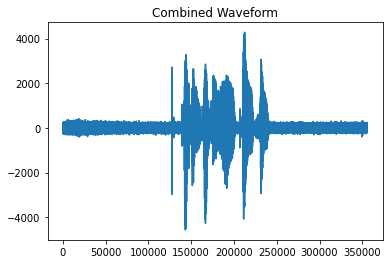

In [287]:
add = []

for i in range(len(signal)):
    add.append(signal[i][0] ) #+ signal[i][1]


plt.plot(add)
plt.title("Combined Waveform")
plt.show()

In [288]:
N = sample_rate * int(time[-1])

print(N)

FFT = rfft(add)
FFTFREQ = rfftfreq(N, (1 / sample_rate))

352800


C:\Users\b.t.white\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


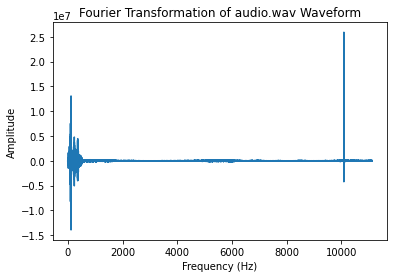

In [289]:
plt.plot(FFTFREQ[range(len(FFT)//2)], FFT[range(len(FFT)//2)])                                                          
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of audio.wav Waveform')
plt.savefig('img/image2-frequency.jpg', dpi=1200)
plt.show()

In [290]:
import numpy as np

threshold = np.percentile(FFT, 95)

print('Iterating ' + str(len(FFT)//2) + ' for [!>]:' + str(threshold))

Iterating 88967 for [!>]:(43269.149452782774-11035.390974330412j)


In [291]:
LOWER_LIM = 125
UPPER_LIM = 8000

UPPER_FREQ_LIM = FFTFREQ[len(FFT)//2] # 11120.875Hz (when using 10khz example)

for i in range(len(FFT)//2):
    if FFTFREQ[i] < UPPER_LIM and FFTFREQ[i] > LOWER_LIM:
        pass
    else:
        FFT[i] = 0

C:\Users\b.t.white\AppData\Local\Programs\Python\Python38-32\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


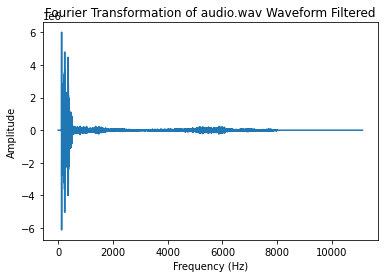

In [292]:
plt.plot(FFTFREQ[range(len(FFT)//2)], FFT[range(len(FFT)//2)])                                                           
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Fourier Transformation of audio.wav Waveform Filtered')
plt.savefig('img/image3-de_noised.jpg', dpi=1200)
plt.show()

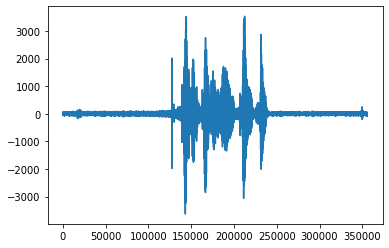

In [297]:
from scipy.fft import irfft

de_noised = irfft(FFT)
plt.plot(de_noised) 
plt.show()

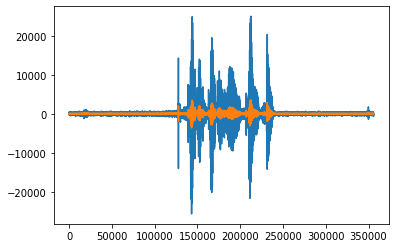

In [294]:
K = 25000 #32767
norm_new_sig = np.int16(de_noised * (K / de_noised.max()))

plt.plot(norm_new_sig)
plt.plot(de_noised)
plt.title("Normalized Clean File")
plt.show()

write(file_name + "-clean.wav", sample_rate, norm_new_sig)